Train#=371822 Test#=112548
Labels=[0.0, 1.0]
DT entropy and d=2
DT entropy and d=4
DT entropy and d=6
DT entropy and d=8
DT entropy and d=10
DT entropy and d=12
DT entropy and d=14
DT entropy and d=16
DT entropy and d=18
DT entropy and d=20
DT entropy and d=22
DT entropy and d=24
DT gini and d=2
DT gini and d=4
DT gini and d=6
DT gini and d=8
DT gini and d=10
DT gini and d=12
DT gini and d=14
DT gini and d=16
DT gini and d=18
DT gini and d=20
DT gini and d=22
DT gini and d=24
DT best with entropy and d=2


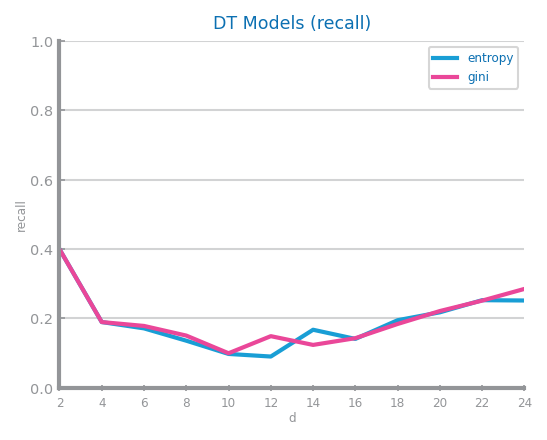

In [11]:
from typing import Literal
from numpy import array, ndarray
from matplotlib.pyplot import figure, savefig, show
from sklearn.tree import DecisionTreeClassifier
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, read_train_test_from_files
from dslabs_functions import plot_evaluation_results, plot_multiline_chart

temp_model: DecisionTreeClassifier | None = None
def trees_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, d_max: int=10, lag:int=2, metric='accuracy'
        ) -> tuple:
    criteria: list[Literal['entropy', 'gini']] = ['entropy', 'gini']
    depths: list[int] = [i for i in range(2, d_max+1, lag)]

    best_model: DecisionTreeClassifier | None = None
    best_params: dict = {'name': 'DT', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict = {}
    for c in criteria:
        y_tst_values: list[float] = []
        for d in depths:
            clf = DecisionTreeClassifier(max_depth=d, criterion=c, min_impurity_decrease=0)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params['params'] = (c, d)
                best_model = clf
            if d == 4:
                temp_model = clf
            print(f'DT {c} and d={d}')
        values[c] = y_tst_values
    print(f"DT best with {best_params['params'][0]} and d={best_params['params'][1]}")
    plot_multiline_chart(depths, values, title=f'DT Models ({metric})', xlabel='d', ylabel=metric, percentage=True)

    return best_model, best_params

file_tag = 'class_pos_covid'
train_filename = f'data/{file_tag}_train_smote.csv'
test_filename = f'data/{file_tag}_test.csv'
target = 'CovidPos'
eval_metric = 'recall'

trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = trees_study(trnX, trnY, tstX, tstY, d_max=25, metric=eval_metric)
savefig(f'images/{file_tag}_dt_{eval_metric}_study.png')
show()

In [3]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=2,
                       min_impurity_decrease=0)

In [4]:
params

{'name': 'DT', 'metric': 'recall', 'params': ('entropy', 2)}

AttributeError: 'NoneType' object has no attribute 'predict'

<Figure size 600x450 with 0 Axes>

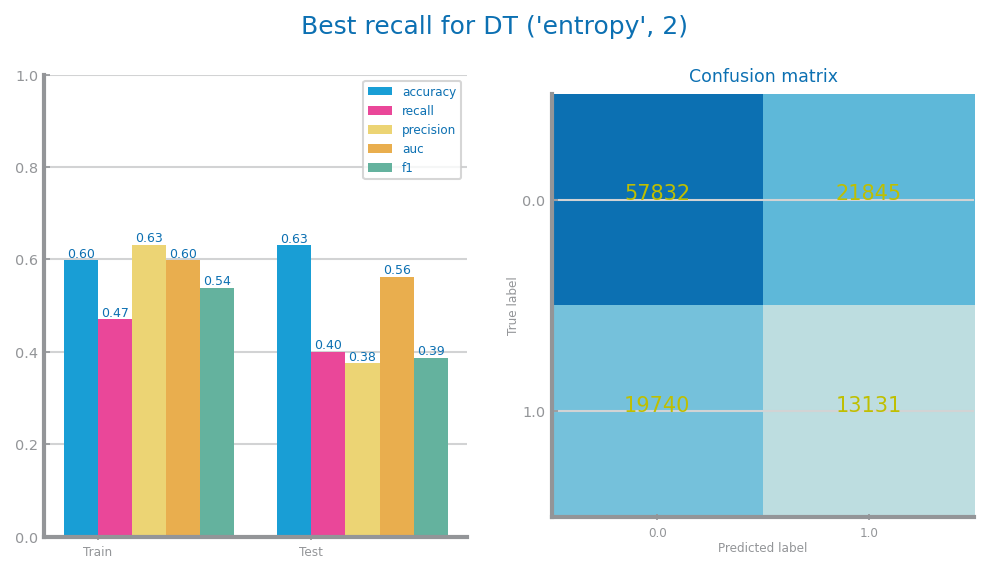

In [12]:

for i in [2, 4]:
    params['params'] = ('entropy', i)

    if i == 2:
        prd_trn: array = best_model.predict(trnX)
        prd_tst: array = best_model.predict(tstX)
    else:
        prd_trn: array = temp_model.predict(trnX)
        prd_tst: array = temp_model.predict(tstX)
    figure()
    plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
